In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(r'car_data.csv')

df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
print(df.head())

         Car_id       Date Customer Name Gender  Annual Income  \
0  C_CND_000001 2022-01-02     Geraldine   Male          13500   
1  C_CND_000002 2022-01-02           Gia   Male        1480000   
2  C_CND_000003 2022-01-02        Gianna   Male        1035000   
3  C_CND_000004 2022-01-02       Giselle   Male          13500   
4  C_CND_000005 2022-01-02         Grace   Male        1465000   

                           Dealer_Name   Company       Model  \
0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
1                     C & M Motors Inc     Dodge     Durango   
2                          Capitol KIA  Cadillac    Eldorado   
3               Chrysler of Tri-Cities    Toyota      Celica   
4                    Chrysler Plymouth     Acura          TL   

                      Engine Transmission       Color  Price ($)  Dealer_No   \
0  DoubleÂ Overhead Camshaft         Auto       Black      26000  06457-3834   
1  DoubleÂ Overhead Camshaft         Auto       Black     

In [ ]:
print(df.isnull().sum())
df.fillna(method='ffill', inplace=True)

Car_id           0
Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64


C:\Users\DELL\AppData\Local\Temp\ipykernel_13668\17628803.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


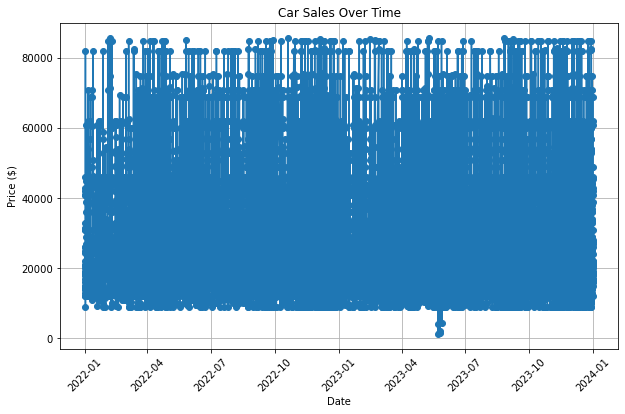

In [ ]:
# Visualize the time series data
plt.figure(figsize=(10, 6))
plt.plot(df['Date'].values, df['Price ($)'].values, marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.title('Car Sales Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
# Plot the rolling mean and rolling standard deviation
rolmean = df['Price ($)'].rolling(window=12).mean()
rolstd = df['Price ($)'].rolling(window=12).std()

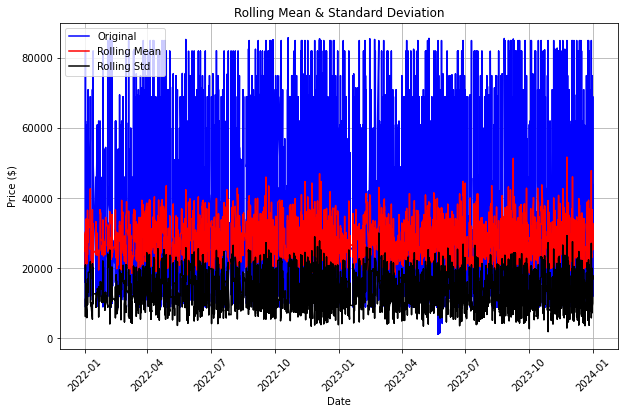

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'].values, df['Price ($)'].values, label='Original', color='blue')
plt.plot(df['Date'].values, rolmean.values, label='Rolling Mean', color='red')
plt.plot(df['Date'].values, rolstd.values, label='Rolling Std', color='black')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.title('Rolling Mean & Standard Deviation')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Define the column containing the time series data
time_series_data = df['Price ($)']

# Perform the Dickey-Fuller test
print('Dickey-Fuller Test Results:')
dftest = adfuller(time_series_data, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' % key] = value
print(dfoutput)


Dickey-Fuller Test Results:
Test Statistic                   -88.615203
p-value                            0.000000
#Lags Used                         2.000000
Number of Observations Used    23903.000000
Critical Value (1%)               -3.430624
Critical Value (5%)               -2.861661
Critical Value (10%)              -2.566834
dtype: float64


In [ ]:
print(df.columns)

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')


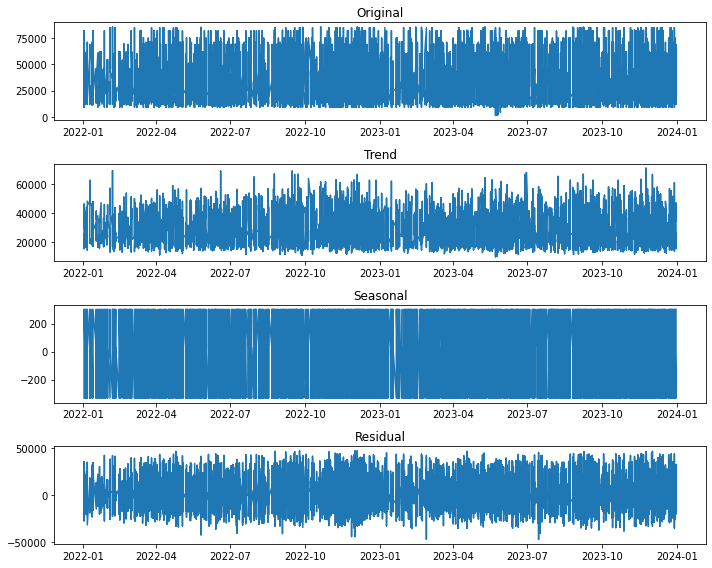

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'Date' is the name of the column containing date information
df.set_index('Date', inplace=True)

# Perform seasonal decomposition
df_decomp = seasonal_decompose(df['Price ($)'], period=3)

# Extracting the components
trend = df_decomp.trend
seasonal = df_decomp.seasonal
residual = df_decomp.resid

# Plotting the components
plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(df['Price ($)'])
plt.title('Original')

plt.subplot(412)
plt.plot(trend)
plt.title('Trend')

plt.subplot(413)
plt.plot(seasonal)
plt.title('Seasonal')

plt.subplot(414)
plt.plot(residual)
plt.title('Residual')

plt.tight_layout()
plt.show()


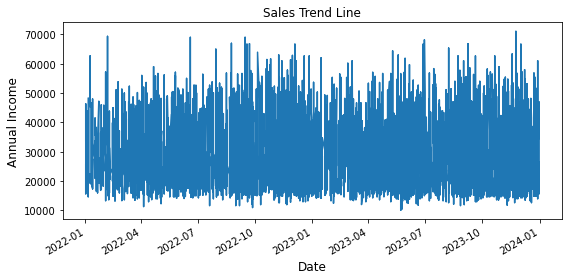

In [ ]:
trend.plot(title='Sales Trend Line',figsize=(8,4))

plt.xlabel('Date',fontsize=12)
plt.ylabel('Annual Income',fontsize=12)

plt.tight_layout()

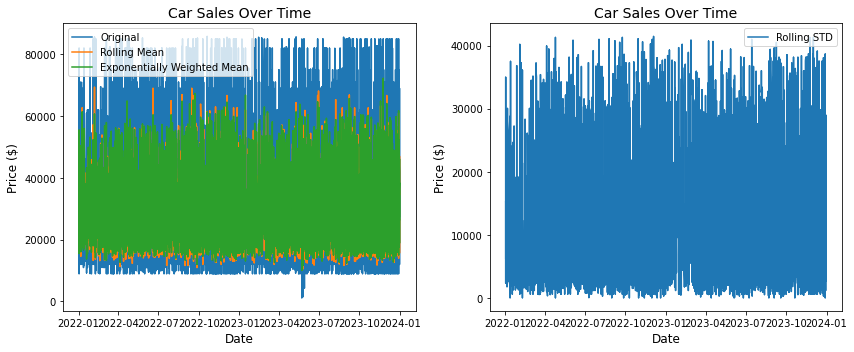

In [ ]:
# Rolling mean
df_rol_mean = df['Price ($)'].rolling(window=3, center=True).mean()

# Exponentially weighted mean
df_ewm = df['Price ($)'].ewm(span=3).mean()

# Rolling standard deviation
df_rol_std = df['Price ($)'].rolling(window=3, center=True).std()

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.plot(df.index.values, df['Price ($)'].values, label='Original')
ax1.plot(df.index.values, df_rol_mean.values, label='Rolling Mean')
ax1.plot(df.index.values, df_ewm.values, label='Exponentially Weighted Mean')
ax1.set_title('Car Sales Over Time', fontsize=14)
ax1.set_ylabel('Price ($)', fontsize=12)
ax1.set_xlabel('Date', fontsize=12)
ax1.legend()

ax2.plot(df.index.values, df_rol_std.values, label='Rolling STD')
ax2.set_title('Car Sales Over Time', fontsize=14)
ax2.set_ylabel('Price ($)', fontsize=12)
ax2.set_xlabel('Date', fontsize=12)
ax2.legend()

plt.tight_layout()
plt.show()


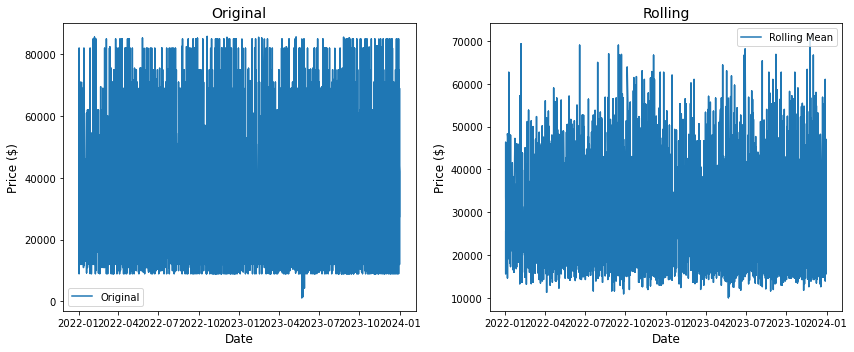

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.set_title('Original', fontsize=14)
ax1.plot(df.index.values, df['Price ($)'].values, label='Original')
ax1.set_ylabel('Price ($)', fontsize=12)
ax1.set_xlabel('Date', fontsize=12)
ax1.legend()

ax2.set_title('Rolling', fontsize=14)
ax2.plot(df.index.values, df_rol_mean.values, label='Rolling Mean')
ax2.set_ylabel('Price ($)', fontsize=12)
ax2.set_xlabel('Date', fontsize=12)
ax2.legend()

plt.tight_layout()
plt.show()


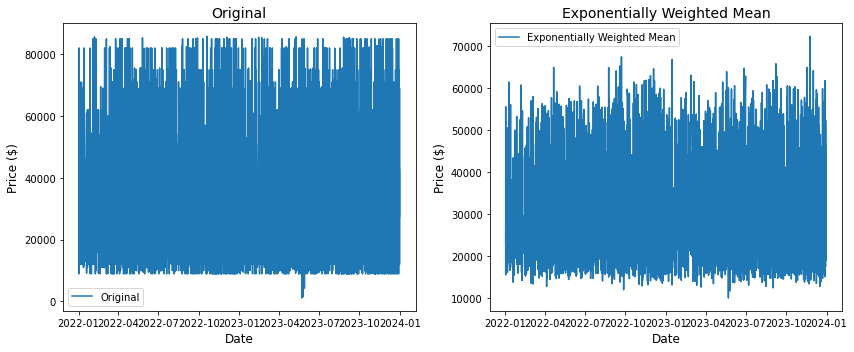

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.set_title('Original', fontsize=14)
ax1.plot(df.index.values, df['Price ($)'].values, label='Original')
ax1.set_ylabel('Price ($)', fontsize=12)
ax1.set_xlabel('Date', fontsize=12)
ax1.legend()

ax2.set_title('Exponentially Weighted Mean', fontsize=14)
ax2.plot(df.index.values, df_ewm.values, label='Exponentially Weighted Mean')
ax2.set_ylabel('Price ($)', fontsize=12)
ax2.set_xlabel('Date', fontsize=12)
ax2.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Drop NaN values from the calculated means
df_rol_mean.dropna(inplace=True)
df_ewm.dropna(inplace=True)

# Dickey-Fuller Test for the Rolling Mean
print('Dickey-Fuller Test for the Rolling Mean:')
dftest_rol_mean = adfuller(df_rol_mean, autolag='AIC')
dfoutput_rol_mean = pd.Series(dftest_rol_mean[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest_rol_mean[4].items():
    dfoutput_rol_mean['Critical Value (%s)' % key] = value
print(dfoutput_rol_mean)

print('')

# Dickey-Fuller Test for the Exponentially Weighted Mean
print('Dickey-Fuller Test for the Exponentially Weighted Mean:')
df_ewm = adfuller(df_ewm, autolag='AIC')
dfoutput_ewm = pd.Series(dftest_ewm[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest_ewm[4].items():
    dfoutput_ewm['Critical Value (%s)' % key] = value
print(dfoutput_ewm)


Dickey-Fuller Test for the Rolling Mean:
Test Statistic                   -20.726690
p-value                            0.000000
#Lags Used                        48.000000
Number of Observations Used    23855.000000
Critical Value (1%)               -3.430624
Critical Value (5%)               -2.861661
Critical Value (10%)              -2.566834
dtype: float64

Dickey-Fuller Test for the Exponentially Weighted Mean:
Test Statistic                   -63.605155
p-value                            0.000000
#Lags Used                         3.000000
Number of Observations Used    23902.000000
Critical Value (1%)               -3.430624
Critical Value (5%)               -2.861661
Critical Value (10%)              -2.566834
dtype: float64


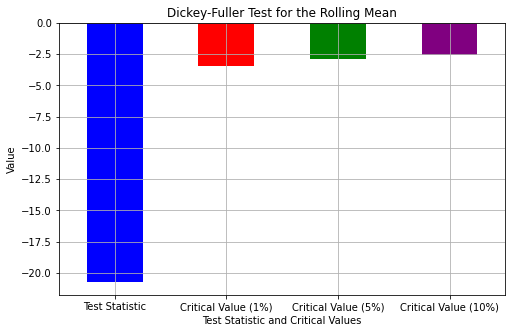

In [ ]:
# Plotting the Dickey-Fuller Test results for Rolling Mean
plt.figure(figsize=(8, 5))
dfoutput_rol_mean[['Test Statistic', 'Critical Value (1%)', 'Critical Value (5%)', 'Critical Value (10%)']].plot(kind='bar', color=['blue', 'red', 'green', 'purple'])
plt.title('Dickey-Fuller Test for the Rolling Mean')
plt.ylabel('Value')
plt.xlabel('Test Statistic and Critical Values')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

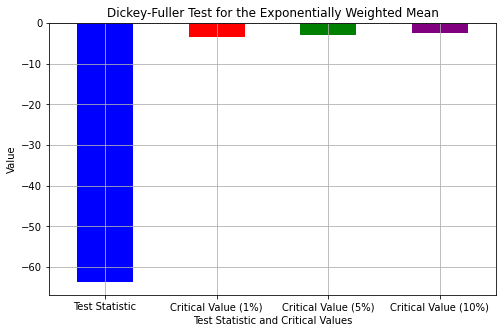

In [ ]:
# Plotting the Dickey-Fuller Test results for Exponentially Weighted Mean
plt.figure(figsize=(8, 5))
dfoutput_ewm[['Test Statistic', 'Critical Value (1%)', 'Critical Value (5%)', 'Critical Value (10%)']].plot(kind='bar', color=['blue', 'red', 'green', 'purple'])
plt.title('Dickey-Fuller Test for the Exponentially Weighted Mean')
plt.ylabel('Value')
plt.xlabel('Test Statistic and Critical Values')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()